In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/local/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [14]:
dataset = pd.read_csv("/Users/mohit.k.bansal/Downloads/Machine Learning A-Z Template Folder/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/Social_Network_Ads.csv")
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [15]:
# Let's just check the dataset and try to find the co-relation -

print(dataset.head(10))
print(dataset.corr())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0
                  User ID       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.000721         0.071097   0.007120
Age             -0.000721  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.155238         1.000000   0.362083
Purchased        0.007120  0.622454         0.362083   1.000000


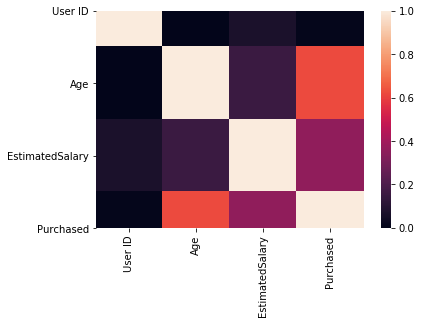

In [16]:
# Let's try to plot the heatmap of features -
corr = dataset.corr()
sns.heatmap(corr)

# This co-relation didnt take gender in account let's transform this data and then try to find the co-relation again.

       0    1           2     3        4    5
0    0.0  1.0  15624510.0  19.0  19000.0  0.0
1    0.0  1.0  15810944.0  35.0  20000.0  0.0
2    1.0  0.0  15668575.0  26.0  43000.0  0.0
3    1.0  0.0  15603246.0  27.0  57000.0  0.0
4    0.0  1.0  15804002.0  19.0  76000.0  0.0
..   ...  ...         ...   ...      ...  ...
395  1.0  0.0  15691863.0  46.0  41000.0  1.0
396  0.0  1.0  15706071.0  51.0  23000.0  1.0
397  1.0  0.0  15654296.0  50.0  20000.0  1.0
398  0.0  1.0  15755018.0  36.0  33000.0  0.0
399  1.0  0.0  15594041.0  49.0  36000.0  1.0

[400 rows x 6 columns]


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


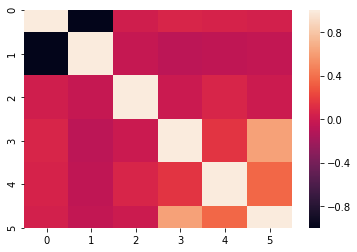

In [64]:
# Transformation and some preprocessing

X=dataset.values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbencoder = LabelEncoder()
X[:, 1] = lbencoder.fit_transform(X[:, 1])
ohencoder = OneHotEncoder(categorical_features=[1])
X = ohencoder.fit_transform(X).toarray()
dataset_transfomed = pd.DataFrame(X)
print(dataset_transfomed)
corr2 = dataset_transfomed.corr()
sns.heatmap(corr2)

# It didn't help either. Let's try out something else.

Index(['Gender_Male', 'Gender_Female'], dtype='object')
      User ID  Gender  Age  EstimatedSalary  Purchased  Gender_Male  \
0    15624510    Male   19            19000          0          0.0   
1    15810944    Male   35            20000          0          0.0   
2    15668575  Female   26            43000          0          1.0   
3    15603246  Female   27            57000          0          1.0   
4    15804002    Male   19            76000          0          0.0   
..        ...     ...  ...              ...        ...          ...   
395  15691863  Female   46            41000          1          1.0   
396  15706071    Male   51            23000          1          0.0   
397  15654296  Female   50            20000          1          1.0   
398  15755018    Male   36            33000          0          0.0   
399  15594041  Female   49            36000          1          1.0   

     Gender_Female  
0              1.0  
1              1.0  
2              0.0  
3      

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


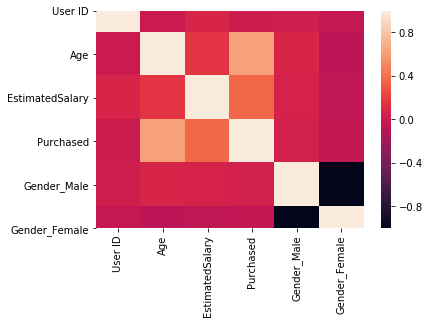

In [67]:
#After plenty of tries this one worked.

dataset = pd.read_csv("/Users/mohit.k.bansal/Downloads/Machine Learning A-Z Template Folder/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/Social_Network_Ads.csv")
X = dataset.iloc[:, [1]].values
#print(X)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbencoder = LabelEncoder()
X[:, 0] = lbencoder.fit_transform(X[:, 0])
#print(X[:, 0])
ohencoder = OneHotEncoder(categorical_features=[0])
X = ohencoder.fit_transform(X).toarray()
dataset_transfomed = pd.DataFrame(X)
dataset_transfomed.rename(columns={0: "Gender_Male", 1: "Gender_Female"}, inplace=True)
print(dataset_transfomed.columns)
dataset = pd.concat([dataset, dataset_transfomed], axis=1)
print(dataset)
corr2 = dataset.corr()
sns.heatmap(corr2)

In [17]:
# Just some fun with data preprocessing.
gender = {"Male": 0,
         "Female": 1}
dataset['Gender'] = dataset['Gender'].map(gender)

In [18]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [30]:
# Same can be achieved using sklearn.
dataset = pd.read_csv("/Users/mohit.k.bansal/Downloads/Machine Learning A-Z Template Folder/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression/Social_Network_Ads.csv")

X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,-1].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lbencoder = LabelEncoder()
X[:, 1] = lbencoder.fit_transform(X[:, 1])
ohencoder = OneHotEncoder(categorical_features=[1])
X = ohencoder.fit_transform(X).toarray()

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [31]:
print(X)

[[0.0000000e+00 1.0000000e+00 1.5624510e+07 1.9000000e+01 1.9000000e+04]
 [0.0000000e+00 1.0000000e+00 1.5810944e+07 3.5000000e+01 2.0000000e+04]
 [1.0000000e+00 0.0000000e+00 1.5668575e+07 2.6000000e+01 4.3000000e+04]
 ...
 [1.0000000e+00 0.0000000e+00 1.5654296e+07 5.0000000e+01 2.0000000e+04]
 [0.0000000e+00 1.0000000e+00 1.5755018e+07 3.6000000e+01 3.3000000e+04]
 [1.0000000e+00 0.0000000e+00 1.5594041e+07 4.9000000e+01 3.6000000e+04]]
